## **O Projeto**

 Estamos atuando como analista de dados na empresa de aluguel de bicicletas London Bike**, de Londres, procurando, após tratar a base de dados, entender quais fatores afetam a demanda por bicletas. Com esses dados**, podemos criar planos de ação especíicos para atender a clientela. 

 Também foi criado, testado e ajustado um modelo que preveja a quantidade de bicicletas serão alugadas no dia ou me mês seguinte, com base em uma análise de série temporal.

 ** _Situação fictícia, projeto feito com base no curso da escola **Alura**_

### **Metodologia**

Para isso, passaremos pelas etapas:
 - Importação dos dados: Extração dos dados direto de sua fonte
 - Preparação de dados: Identificação e tratamento de dados nulos, vazios e duplicados
 - Análise exploratória: Análise das principais características
 - Criação de modelo preditivo

## **1. Importando e preparando os dados**

### **Importando os dados**

Aqui serão extraídos os dados disponibilizados em um repositório do GitHub e salvos em uma variável para que seja possível manipular os dados nas próximas etapas.

In [1]:
#Importando biblioteca pandas
import pandas as pd

In [2]:
#Lendo os dados em salvando em uma variável em formato DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')

In [3]:
#Exibindo os 5 primeiros registros da tabela
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


 Até o momento, a variável _df_ contém nossos dados extraídos, se tratando de um DataFrame Pandas que facilita a visualização. A partir de agora, será possível iniciaro tratamento e preprocessamento dos dados, através da identificação e tratamento de dados nulos, campos vazios e dados duplicados.

### **Tratando dados nulos**

Aqui iremos identificar os dados nulos e suas quantidades para que, com base nisso, possamos tratar da forma ideal.

In [4]:
#Verificando as dimensões da tabela
df.shape

(17429, 10)

In [5]:
#Exibindo outras informações sobre a tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [6]:
#Verificando o número de dados nulos contidos em cada tabela
df.isnull().sum()

data_hora            0
contagem             0
temperatura         23
sensacao_termica    23
umidade              0
velocidade_vento     0
clima                0
feriado              0
fim_de_semana        0
estacao              0
dtype: int64

Identificamos que as colunas _temperatura_ e _sensação térmica_ possuem 23 campos nulos em cada uma (NaNs). Nesse caso, podemos seguir com a utilização do método _interpolate()_, que estima valores ausentes com base nos dados existentes que temos. Por se tratar de dados que seguem uma tendência linear, podemos estimá-los mantendo a coerência e continuidade.

In [7]:
#Utilizando o método interpolate para estimar os valores das colunas
df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')

In [8]:
#Exibindo os 5 primeiros registros
df.head(5)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


### **Identificando e removendo dados duplicados**

Aqui iremos identificar os dados duplicados e suas quantidades para que, com base nisso, possamos tratar da forma ideal.

In [9]:
#Identificando a quantidade de linhas duplicadas
df.duplicated().sum()

np.int64(15)

In [10]:
#Salvando as duplicatas em uma variável
duplicatas = df.duplicated(keep=False)

#Selecionando as linhas duplicadas com base no resultado anterior
linhas_duplicadas = df[duplicatas]

#Ordenando as linhas duplicadas pela coluna 'data_hora'
linhas_duplicadas.sort_values(by='data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [11]:
#Excluindo as linhas duplicadas
df_limpo = df.drop_duplicates()

In [12]:
#Verificando as novas dimensões da tabela
df_limpo.shape

(17414, 10)

Agora temos nosso primeiro conjunto de dados estruturados e limpos que utilizaremos para as próximas análises.

## **2. Análise Exploratória**

Agora que já temos o primeiro dataset bruto, podemos iniciar o entendimento de algumas características destes dados. Para isso, iremos utilizar visualizações gráficas com as bibliotecas matplotlib e seaborn para identificar a relação e correlação entre as variáveis.

### **Obtendo estatísticas descritivas**

In [13]:
#Verificando estatísticas descritivas das colunas e exibindo
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


### **Analisando as distribuições**

Para analisar as distribuições, utilizamos nesse caso, histogramas. Principalmente pela facilidade em se identificar simetrias, outliers, picos e dispersão.

In [14]:
#Importando as bibliotecas 
import seaborn as sns
import matplotlib.pyplot as plt

#### **Plotando gráfico de temperatura e sensação térmica**

Por se tratar de dados de um país europeu, percebemos que a maior parte da frequência está concentrada na faixa dos 15°C, diminuindo a medida que se aproxima de valores mais afastados dessa faixa. 

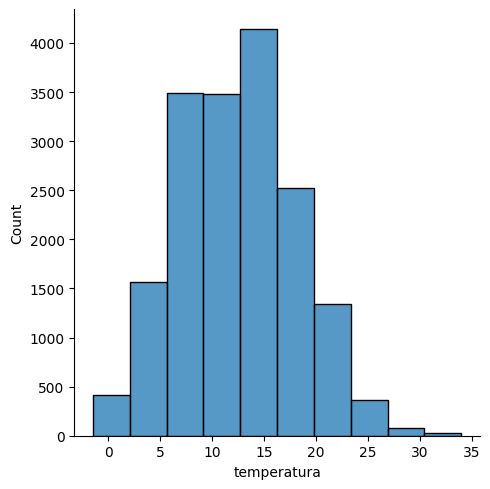

In [18]:
#Plotando gráfico temperatura
sns.displot(df_limpo, x='temperatura', bins=10)
plt.show()

Assim como o gráfico anterior, ao plotar o gráfico de sensação térmica obtivemos valores semelhantes, representando algo próximo a uma distribuição normal. 

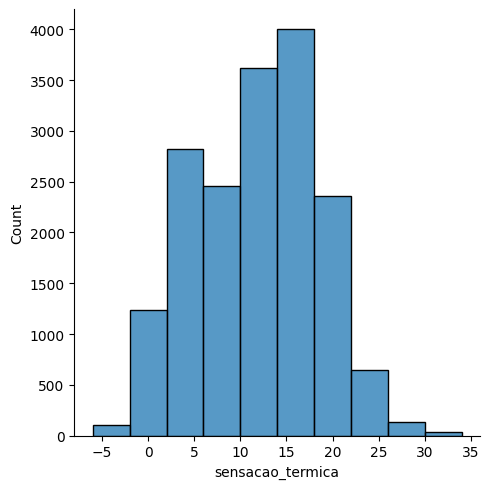

In [19]:
#Plotando gráfico sensação térmica
sns.displot(df_limpo, x='sensacao_termica', bins=10)
plt.show()

#### **Plotando gráfico de umidade**

Nos próximos gráficos obtivemos uma distribuição diferente, se tratando de uma distribuição distorcida.

No caso da umidade, vemos que temos uma frequência maior em umidades maiores, porém diminuindo na última faixa próximo aos 100%, o que representaria dias mais úmidos e chuvosos. Temos aqui uma distribuição distorcida para a direita.

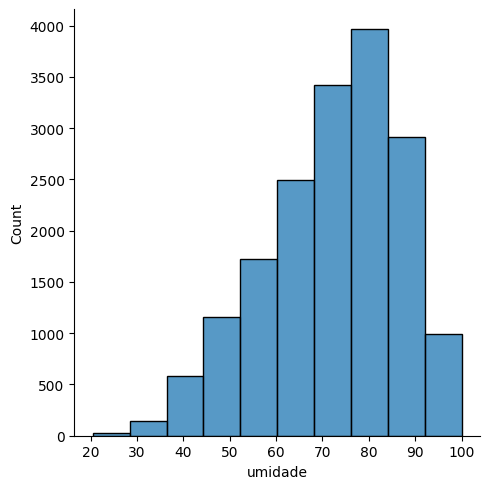

In [21]:
#Plotando gráfico umidade
sns.displot(df_limpo, x='umidade', bins=10)
plt.show()

No caso da velocidade do vento, no qual temos uma distribuição distorcida para a esquerda, temos a informação inversa de que a maior frequência se dá em faixas de velocidade menores, salvo a primeira faixa. Essa  primeira faixa representaria, por se tratar de uma menor velocidade de vento, dias nas quais a temperatura está alta.

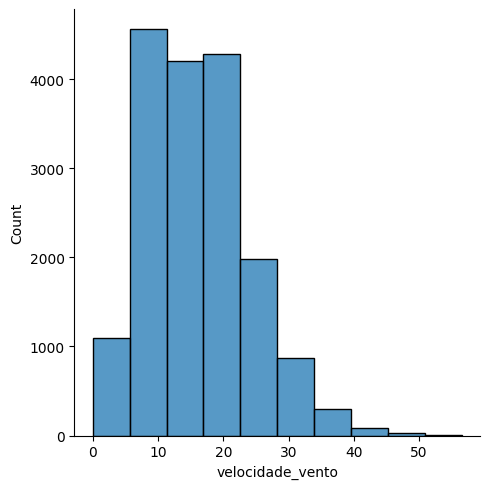

In [23]:
sns.displot(df_limpo, x='velocidade_vento', bins=10)
plt.show()

### **Investigando relações entre variáveis**

Para investigar a relação entre as variáveis será utilizado o gráfico _scatterplot_ (ou gráfico de dispersão), no qual compararemos as variáveis com a _contagem_.

Avaliando os dois primeiros gráficos, referentes a contagem vs temperatura e sensação térmica, percebemos que não podemos concluir se tratar de uma relação linear, pois vemos que com o aumento da temperatura sensação térmica nem sempre a contagem se comporta de forma crescente também. Nos valores mais altos vemos uma queda na contagem. Verificando lado a lado vemos que os dois gráficos se comportam de forma semelhante.

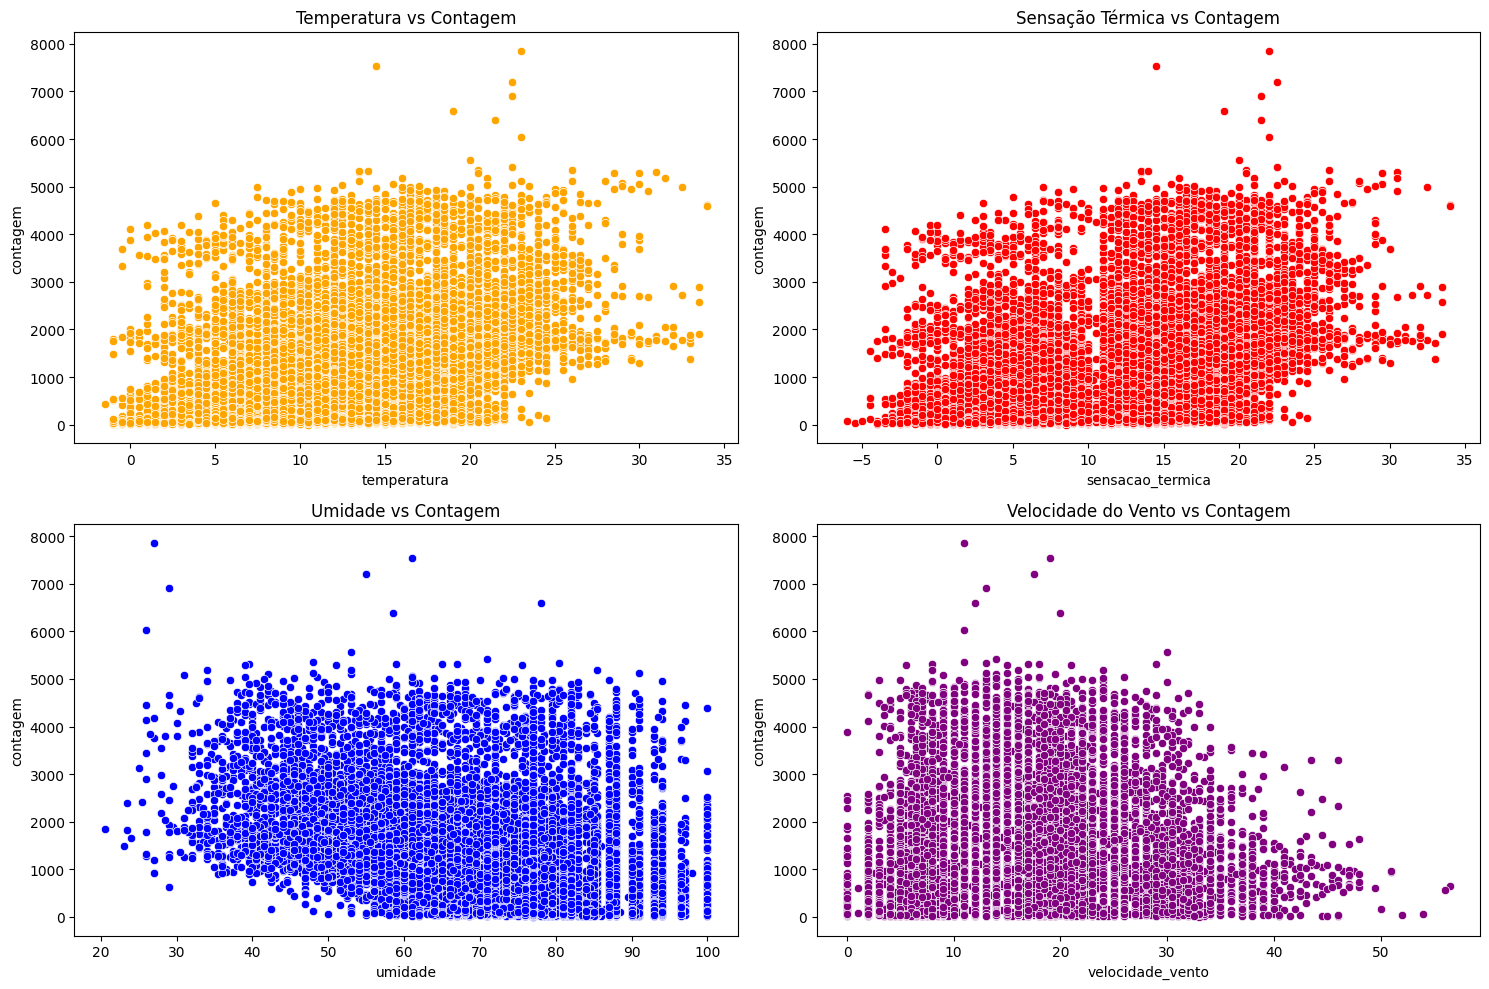

In [24]:
#Setando a disposição dos gráficos e tamanho
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#Plotando cada um dos gráficos com suas configurações
sns.scatterplot(ax=axes[0, 0], data=df_limpo, x='temperatura', y='contagem', color='orange')
axes[0, 0].set_title('Temperatura vs Contagem')
sns.scatterplot(ax=axes[0, 1], data=df_limpo, x='sensacao_termica', y='contagem', color='red')
axes[0, 1].set_title('Sensação Térmica vs Contagem')
sns.scatterplot(ax=axes[1, 0], data=df_limpo, x='umidade', y='contagem', color='blue')
axes[1, 0].set_title('Umidade vs Contagem')
sns.scatterplot(ax=axes[1, 1], data=df_limpo, x='velocidade_vento', y='contagem', color='purple')
axes[1, 1].set_title('Velocidade do Vento vs Contagem')

#Ajustando e exibindo
plt.tight_layout()
plt.show()

No gráfico de umidade vs contagem temos um comportamento diferente dos gráficos vistos anteriormente. Seguindo o histograma, temos as maiores quantidades contidas entre 60% e 80% de umidade do ar, as temos uma diminuição acima de 90%, mostrando uma maior quantidade deslocada do centro.

Por fim, no gráfico de velocidade vemos um comportamento contrário. Em faixas como entre 10km/h e 30km/h temos maiores contagens, mas caem em velocidades abaixo de 10km/h. Assim como também deixam de existir pontos acima de 60km/h.

### **Examinando a correlação entre as variáveis**

Correlação é uma medida estatística que descreve a relação entre duas variáveis. Existem diferentes tipos de correlação, mas a correlação de Pearson é uma das mais comuns, na qual mede a força e a direção de uma relação linear entre duas variáveis. Ela produz um valor de correlação que varia de -1 a 1.

Aqui usaremos o mapa de calor, que mostra através de cores e da correlação de person a medida de relação entre as variáveis.

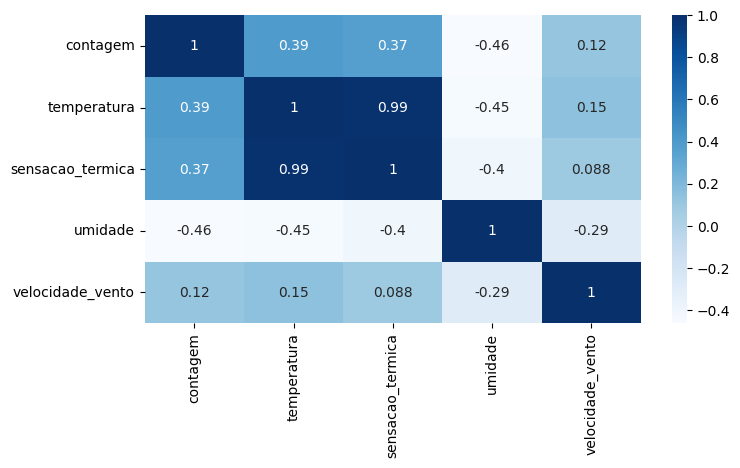

In [26]:
#Definindo as configurações do mapa de calor 
plt.figure(figsize=(8,4))

#Definindo parâmetros como valores numéricos, anotações e cores e exibindo
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

O mapa de calor mostra uma escala de tons de azul, na qual os tons mais escuros indicam valores mais próximos a 1 (correlação mais alta), enquanto tons mais claros estão mais próximos a -1 (correlação mais baixa).

Como vimos nos gráficos anteriormente, as variaveis temperatura e sensação térmica se distribuiam de forma semelhante e isso pode ser visto também no mapa de calor, na qual apresenta a correlação mais alta, de 0.99.

Agora, podemos comparar cada variável com a variável contagem para ver seu comportamento. Vemos que, com relação as variáveis temperatura e sensação térmica apresenta correlações razoáveis (0.39 e 0.37 respectivamente), mas não muito altas, assim como com a variável velocidade do vento, que apresenta baixa correlação (0.12). 

Já com a variável umidade temos um comportamento diferente, no qual vemos uma correlação negativa, indicando que quanto menor a umidade, menor a quantidade de bicicletas alugadas. 

## **3. Explorando os dados categóricos**

Agora, ao invés de analisar as variáveis numéricas como feito anteriormente, iremos analisar as variáveis categóricas. 

### **Obtendo estatísticas descritivas**

Ao exibi-las, percebemos algumas informações importantes. Como os principais climas (Céu limpo) que apareceram e a principal estação (Primavera), assim como a quantidade de vezes que apareceram e também que alguns são binários (sim ou não). A partir disso conseguimos aprofundar um pouco mais nessas informações e compará-las. 

In [42]:
#Exibindo as estatísticas descritivas das variáveis categóricas
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2017-01-03 23:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


Obtendo a quantidade de valores únicos podemos descobrir quais são esses outros valores.

In [43]:
#Obtendo os valores únicos de cada coluna
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
  print(f'Coluna: {col}')
  print(df_limpo[col].unique(),'\n')
  print('='*60)

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas'] 

Coluna: feriado
['Não' 'Sim'] 

Coluna: fim_de_semana
['Sim' 'Não'] 

Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono'] 



Podemos começar comparando as colunas contendo dias normais, finais de semana e feriados em relação a quantidade. 

### **Comparando dias normais, feriados e finais de semana**

Podemos analisar se a quantidade de aluguéis durante feriados e finais de semana são maiores ou menos, em relação aos aluguéis feitos em dias úteis.

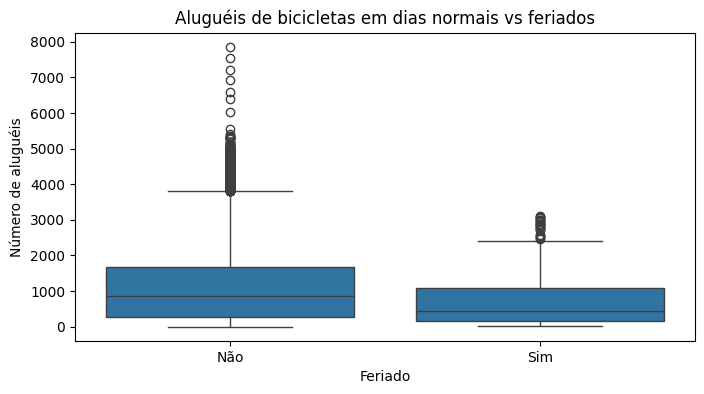

In [46]:
#Comparando dias normais e feriados com um boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='feriado', y='contagem', data=df_limpo)
plt.title('Aluguéis de bicicletas em dias normais vs feriados')
plt.xlabel('Feriado')
plt.ylabel('Número de aluguéis')
plt.show()

O boxplot mostra que temos uma maior dispersão nos dias normais e uma menor dispersão em dias de feriado. Porém, para os dias normais obtivemos uma grande quantidade de outliers, assim para os feriados forem menos outliers.

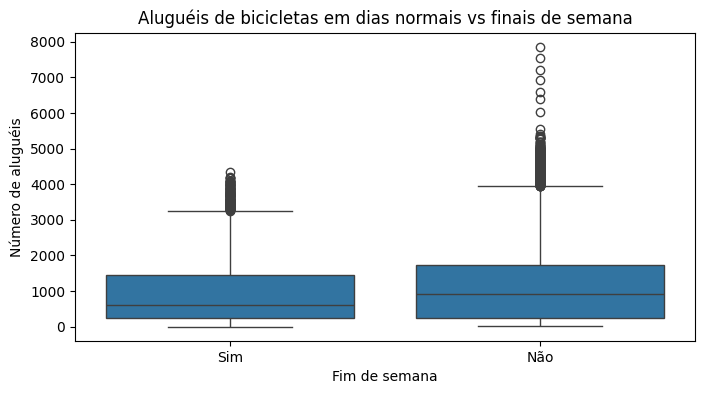

In [45]:
#Comparando dias normais e finais de semana com um boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='fim_de_semana', y='contagem', data=df_limpo)
plt.title('Aluguéis de bicicletas em dias normais vs finais de semana')
plt.xlabel('Fim de semana')
plt.ylabel('Número de aluguéis')
plt.show()

Aqui vemos algo parecido com o anterior, em dias normais a distribuição se mostra maior. Podemos comparar as medianas para entender essa diferença.

In [47]:
#Obtendo as medianas
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()
mediana_feriado

feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64

In [48]:
#Imprimindo a mediana para fim de semana
mediana_fim_de_semana

fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64

Assim, concluímos que temos maior número de alugueis em dias normais do que em dias de feriado ou finais de semana.

### **Investigando como o clima afeta a demanda**

Como temos uma maior quantidade de categorias, podemos utilizar o gráfico de barras para comparar as quantidades por clima.

Vimos que, assim como mostrado nas informações obtidas anteriormente, no clima Céu limpo obtemos a maior contagem, seguido por Parcialmente nublado e Nublado. Essas provavelmente são consideradas climas mais propensos ao aluguél de bicicletas para uso de transporte cotidiano, como ir ao trabalho, escola ou até ao supermercado.

Porém, temos uma menor contagem em climas como Chuva leve, Chuva com trovoadas e neve, por se trataram de climas menos propícios para se andar de bicicleta. 

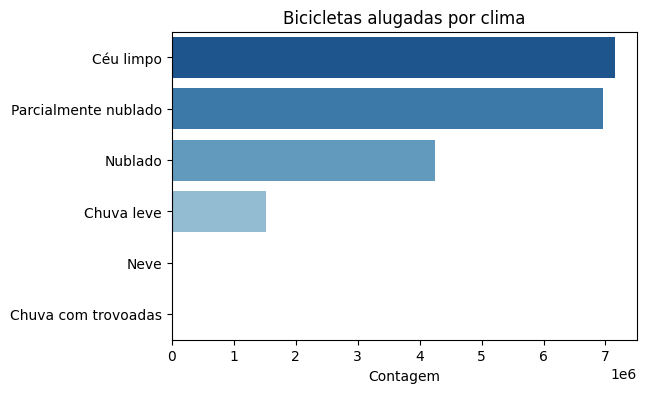

In [51]:
#Criando nova variável que contém agrupada a contagem pelo clima
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

#Ajustando e plotando o gráfico
plt.figure(figsize=(6,4))
sns.barplot(data=df_clima, y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h')
plt.title('Bicicletas alugadas por clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

Como nos casos das variáveis Neve e Chuva com trovoadas possuírem contagens mais baixas em relação às do topo, e por isso nem sequer aparecerem no gráfico, podemos exibir seus números.

In [52]:
#Apresentando a variável 
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


Vemos que, mesmo que em valores mais baixos, mesmos nestes climas ainda possuímos uma quantidade de bicicletas alugadas.

### **Analisando as distribuições por estação**

Agora que comparamos dias normais, feriados, finais de semana e clima, podemos comparar também a variável estação, utilizando um boxplot com as categorias. A partir dessas informações, será que precisamos de estratégias específicas para cada estação do ano? 

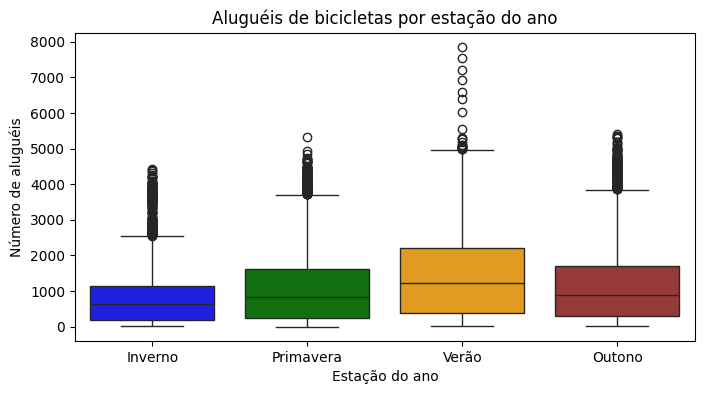

In [55]:
#Definindo as dimensões
plt.figure(figsize=(8,4))

#Definindo a paleta de cores
paleta_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown' , 'Inverno': 'blue'}

#Ajustando os parâmetros e exibindo o gráfico
sns.boxplot(x='estacao', y='contagem', data=df_limpo, hue='estacao', palette=paleta_cores)
plt.title('Aluguéis de bicicletas por estação do ano')
plt.xlabel('Estação do ano')
plt.ylabel('Número de aluguéis')
plt.show()

Vemos que a que tem maior dispersão seria o verão, com maior mediana, enquanto a menor estaria no inverno, com menor mediana. 

Com relação as outras duas, primavera e outono, elas parecem ter medidas muito semelhantes, mas sendo maiores que as do inverno e menores que as do verão. Podemos ver se realmente são iguais, de forma estatística, a partir de suas medianas.

In [56]:
#Exibindo mediana de cada estação
df_limpo.groupby('estacao')['contagem'].median()

estacao
Inverno       632.0
Outono        898.0
Primavera     823.0
Verão        1214.0
Name: contagem, dtype: float64

Pela proximidade dos valores, podemos utilizar o Teste _Mann-Whitney_, um teste não paramétrico para amostras que são independentes, para descobrir se realmente são iguais. Temos que:

**Formulando as hipóteses:**

$H_0:$ As distribuições são iguais.\
$H_1:$ As distribuições são diferentes.

Caso obtenhamos um valor _p_ maior que 0.05, descartamos a hipótese alternativa, caso contrário, rejeitamos a hipótese nula.

In [57]:
#Importando biblioteca scipy
from scipy.stats import mannwhitneyu

In [58]:
#Filtrando os dados da primavera e outono
primavera = df_limpo[df_limpo['estacao'] =='Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

In [59]:
#Aplicando o teste de Mann-Whitney
u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
u_statistic, p_value

(np.float64(9044682.5), np.float64(0.0004762100221646297))

Como obtivemos um valor _p_ menor que 0.05, rejeitamos a hipótese nula e aceitamos que as distribuições diferentes. Dessa forma, precisaríamos de planos de ação diferentes para cada estação.

## **4. Analisando os dados ao longo do tempo**

Agora que comparamos e entendemos as relações das variáveis categóricas, podemos começar a verificar esses resultados ao longo do tempo.

### **Convertendo tipos de dados**

Para manipular dados de tempo precisamos primeiro converte-los para o tipo de variável correta. Aqui vemos que a variável data_hora está indicada como object, por isso precisamos transformá-la.

In [61]:
#Exibindo informações sobre o DataFrame
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [69]:
#Copiando o dataset para não sobreescrevê-lo
df_data = df_limpo.copy()

In [70]:
#Convertendo a coluna data_hora para o formato datetime:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


Com o info() podemos verificar se essas alterações realmente foram aplicadas.

In [71]:
#Exibindo informações do DataFrame
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


Agora com esse formato podemos criar novas colunas contendo só a hora ou só o mês, para analisar a demanda de bicicletas por hora e por mês.

In [72]:
#Criando novas colunas: mes e horario
df_data['mes'] = df_data['data_hora'].dt.month
df_data['horario'] = df_data['data_hora'].dt.hour
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [73]:
#Retirando o horário da coluna data_hora
df_data['data_hora'] = df_data['data_hora'].dt.date
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [74]:
#Renomeando a coluna data_hora para data:
df_data = df_data.rename(columns={'data_hora': 'data'})
df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [78]:
#Verificando as alterações
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 1.6+ MB


In [81]:
#Convertendo a coluna data para o formato datetime:
df_data['data'] = pd.to_datetime(df_data['data'])

In [82]:
#Exibindo as informações
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 1.6+ MB


Agora temos as novas colunas estruturadas para que possamos comparar a contagem com o tempo (hora, mês, data).

### **Analisando a demanda por horário**

Ao analisar o horário, queremos saber se existe um horário de pico para aluguéis de bicicletas e se também existe um momento com menos aluguéis. Iremos utilizar um gráfico de barras para verificar essa diferença.

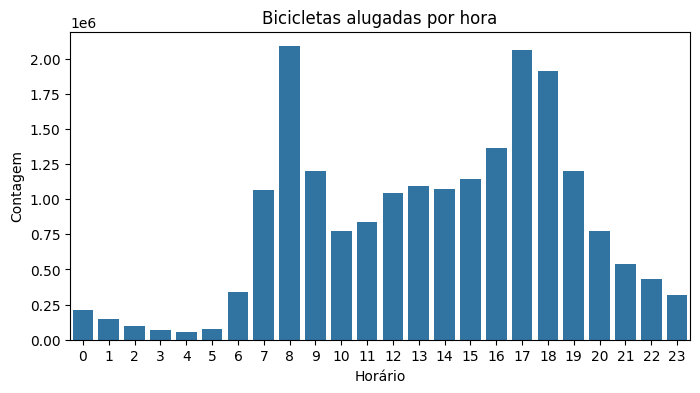

In [84]:
#Definindo a variável com o filtro
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

#Ajustando os parâmetros e plotando gráfico de barras
plt.figure(figsize=(8,4))
sns.barplot(data=df_por_hora, x='horario', y='contagem')
plt.title('Bicicletas alugadas por hora')
plt.xlabel('Horário')
plt.ylabel('Contagem')
plt.show()

Podemos perceber que durante a passagem de tempo temos um pico as 8h e outro entre as 17h e 18h, podendo ser horários que as pessoas geralmente vão para o trabalho, escola ou faculdade. Durante a madrugada esses valores caem bastante.

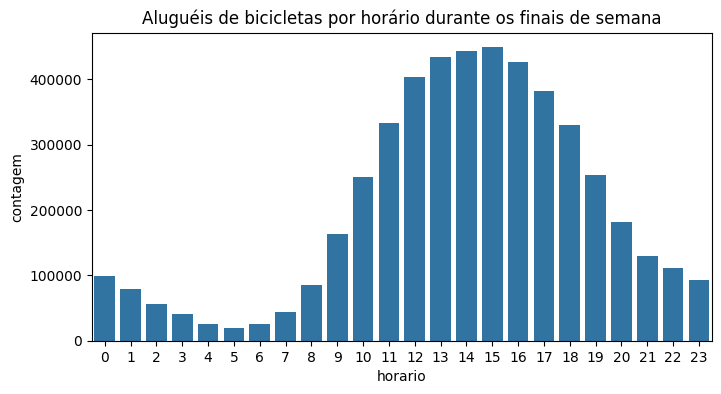

In [85]:
# Analisando os finais de semana
df_fim_de_semana = df_data[df_data['fim_de_semana'] == 'Sim']
alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()


plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=alugueis_fim_de_semana)
plt.title('Aluguéis de bicicletas por horário durante os finais de semana')
plt.show()

Já nos finais de semana temos um padrão muito diferente. Temos um pico as 15h, porém maior quantidade distribuída ao longo do dia, provavelmente sendo utilizadas para lazer.

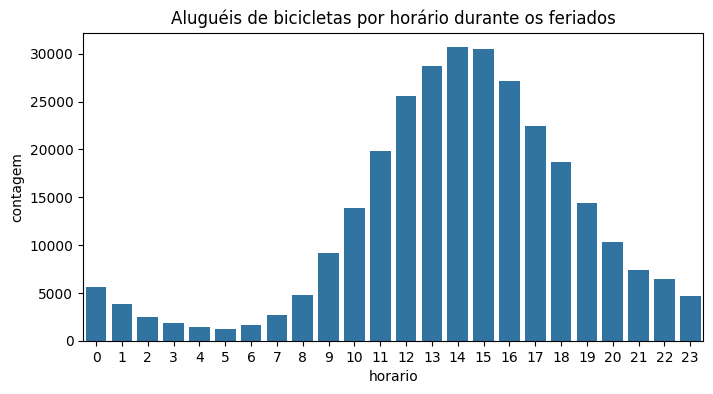

In [86]:
# Analisando os feriados
df_feriado = df_data[df_data['feriado'] == 'Sim']
alugueis_feriado = df_feriado.groupby('horario')['contagem'].sum().reset_index()


plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=alugueis_feriado)
plt.title('Aluguéis de bicicletas por horário durante os feriados')
plt.show()

Apesar de o uso aos feriados ser bastante semelhante aos finais de semana, temos um pico diferente, sendo este as 14h.

### **Analisando a demanda por dia e mês**

Agora podemos analisar com relação ao dia e mês para entender a distribuição ao longo do tempo.

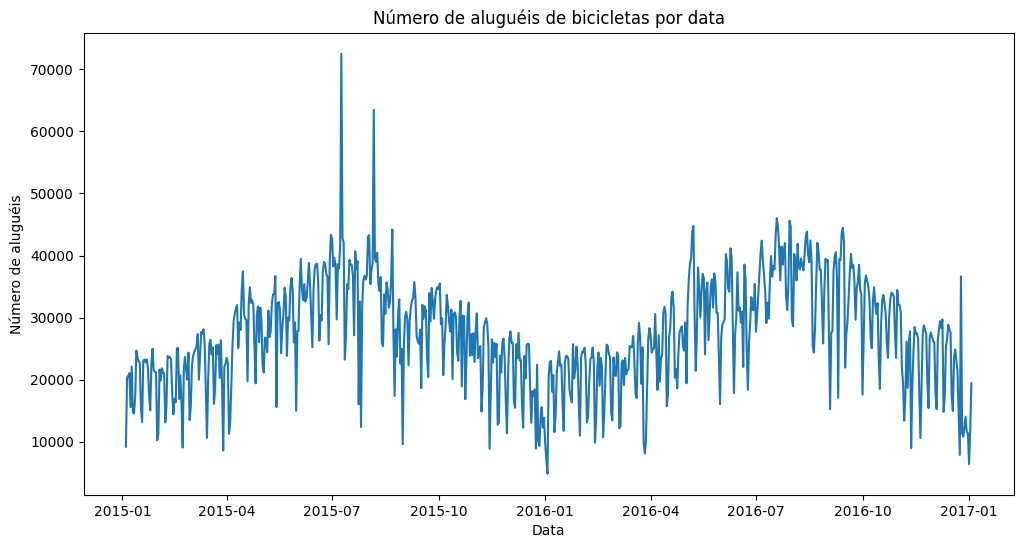

In [89]:
#Criando filtro de contagem por data
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()

#Ajustando configurações e plotando gráfico
plt.figure(figsize=(12,6))
sns.lineplot(data=df_tempo, x='data', y='contagem')
plt.title('Número de aluguéis de bicicletas por data')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')
plt.show()

Podemos ver que o gráfico segue um padrão com relação a passagem dos meses, a sazonalidade. Vemos que possuímos uma contagem maior durante o mês de julho em ambos os meses mostrados. Podemos aprofundar um pouco mais com relação aos meses.

Obs.: Podemos verificar que em julho de 2015 houveram picos de aluguéis. Será que isso teria algum motivo? 
Pesquisando eventos que aconteceram nesse período, vemos que foi o momento no qual ocorreram greves no transporte público, acarretando em um maior número de alguéis. 

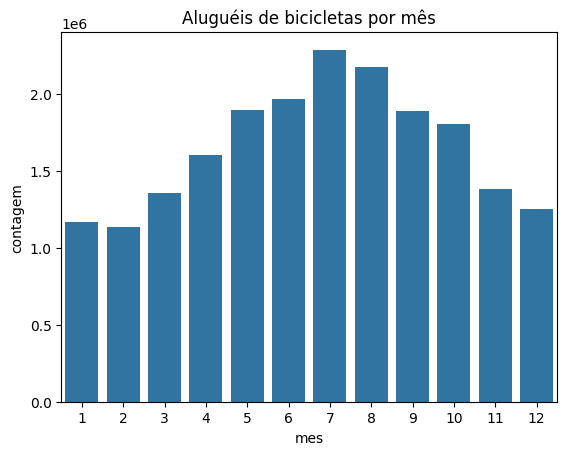

In [90]:
#Definindo filtros para contagem nos meses
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()

#Ajustando e plotando o gráfico de barras
sns.barplot(data=alugueis_mensais, x='mes', y='contagem')
plt.title('Aluguéis de bicicletas por mês')
plt.show()

Nessa nova visualização conseguimos evidenciar o que percebe no gráfico de linhas. Aqui evidenciamos um recorte dessa sazonalidade, mostrando que (por se tratar de Londres) temos um maior número de aluguéis no verão, que lá acontece no meio do ano.

## **5. Construindo o modelo preditivo**

Para construir o modelo preditivo iremos utilizar a biblioteca Prophet desenvolvida pelo facebook e hoje sendo possuída pela Meta. 

### **Realizando a previsão**

In [50]:
#Atualizando pip
!pip install --upgrade pip setuptools wheel

In [51]:
#Instalando biblioteca
!pip install prophet==1.1.6

In [91]:
#Importando biblioteca
from prophet import Prophet

In [96]:
#Definindo a variável que contem as colunas que serão consideradas
df_prophet = df_data[['data', 'contagem']].rename(columns={'data': 'ds', 'contagem': 'y'})
df_prophet.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [97]:
#Agrupando os dias
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet.head()

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [95]:
#Definindo um seed para garantir a reprodutibilidade
import numpy as np
np.random.seed(4587)

#Instanciando o modelo Prophet
modelo = Prophet()

#Treinando o modelo
modelo.fit(df_prophet)

#Criando um dataframe para previsões futuras
futuro = modelo.make_future_dataframe(periods=90, freq='D')

#Realizando a previsão
previsao = modelo.predict(futuro)

16:49:24 - cmdstanpy - INFO - Chain [1] start processing
16:49:24 - cmdstanpy - INFO - Chain [1] done processing


Agora temos criado o nosso modelo de previsão, incluindo como parâmetro 90 dias. 

### **Explorando os resultados da previsão**

Agora que criamos o modelo, podemos entender quais foram os resultados gerados.

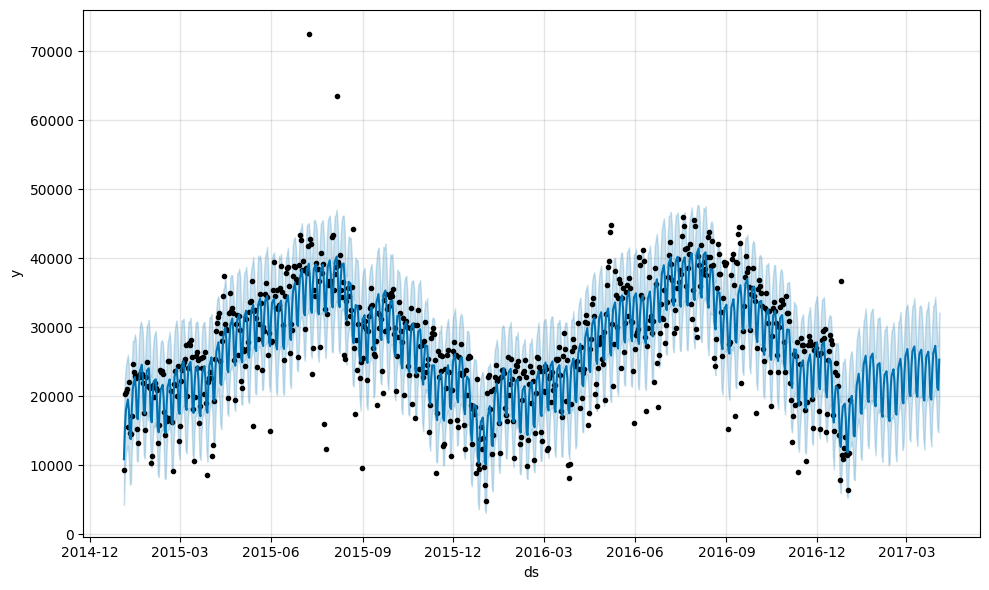

In [102]:
#Armazenando e exibindo o gráfico
fig1 = modelo.plot(previsao)

Notamos que a linha azul do gráfico corresponde a nossa previsão e o ajuste aos valores reais, já comparando com os valores reais (pontos pretos). Os valores em azul claro representam nosso intervalo de confiança, então o ideal é que os dados estejam dentro desse período. Também podemos observar que mostra os outliers das datas especiais.

Vemos que, a partir de dezembro de 2016 temos uma aparência diferente, que indica uma previsão feita pelo modelo para períodos que não foram estabelecidos, com base no que foi visto.

Podemos aprofundar mais nesse período de previsão.

In [103]:
#Imprimindo os valores da previsão
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10867.436698,4248.681464,17121.906796
1,2015-01-05,15279.441783,8890.570729,22594.402077
2,2015-01-06,17984.434533,11808.797686,24375.208227
3,2015-01-07,18716.667970,12325.180844,25327.444016
4,2015-01-08,19529.925007,12793.113904,25988.199728
...,...,...,...,...
815,2017-03-30,27303.158028,20890.868485,34391.306911
816,2017-03-31,25530.545826,19354.636545,32029.859379
817,2017-04-01,21214.278115,15449.716281,27696.529702
818,2017-04-02,20897.149453,14749.799059,27208.615968


A biblioteca Prophet usa um modelo aditivo que inclui componentes sazonais e de tendência. A equação utilizada pelo Prophet para realizar previsões pode ser representada da seguinte forma:

$y(t) = g(t) + s(t) + h(t) + \epsilon_t$

Onde:

- $ y(t)$ é o valor observado na série temporal no tempo \( t \).
- $ g(t) $ é a componente de tendência que modela mudanças de longo prazo.
- $ s(t) $ é a componente sazonal que modela padrões periódicos ou sazonais.
- $ h(t) $ é a componente de efeito de feriados
- $\epsilon_t$ é o erro aleatório na previsão.

Cada uma dessas componentes é modelada separadamente. A componente de tendência, $ g(t)$, é frequentemente modelada como uma função logística ou polinomial. A componente sazonal, $s(t)$, é modelada usando a análise de Fourier para capturar padrões periódicos. A componente de feriado, $h(t)$, é modelada como um efeito aditivo para cada feriado especificado.

Portanto, a equação completa usada pelo Prophet para realizar previsões é uma soma desses componentes mais o erro aleatório.

> Embora em nosso projeto não tenhamos detalhado a inclusão dos feriados no modelo, é importante ressaltar que essa possibilidade existe.


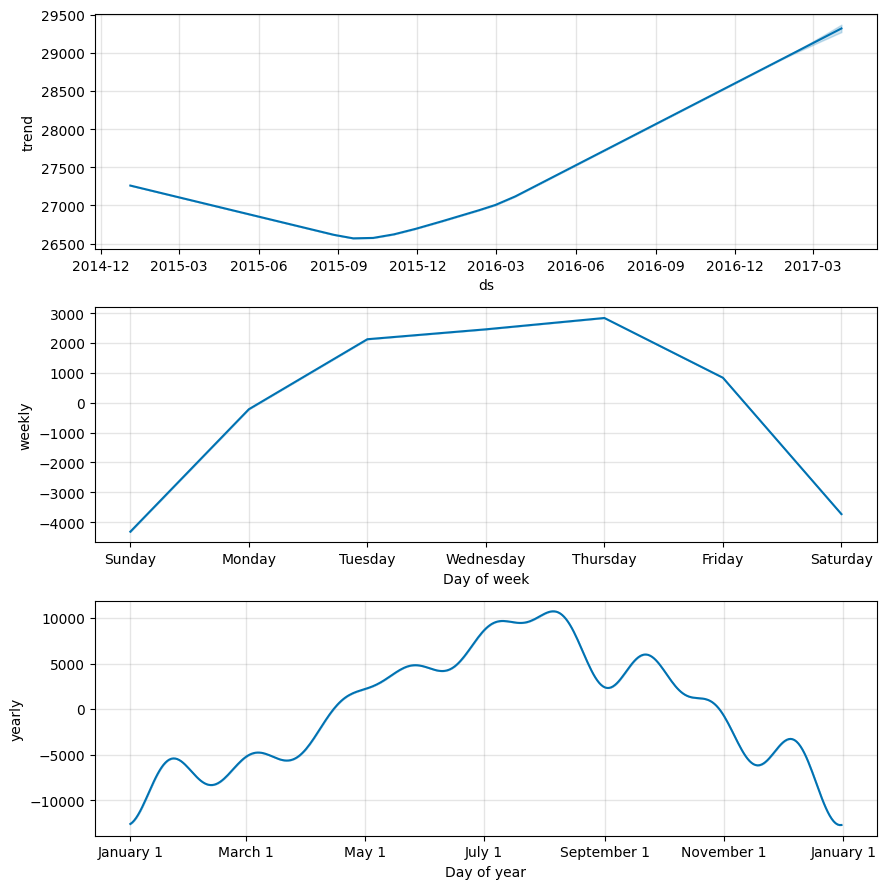

In [104]:
#Imprimindo os componentes
fig2 = modelo.plot_components(previsao)

### **Separando os dados em treino e teste**

Podemos ver que os componentes utilizados para construir o modelo foram _trend_, ressaltando a tendência, _weekly_ o comportamento por semana e _yearly_, o comportamento por ano.

É importante ressaltar que aqui foi utilizado todo o conjunto de dados para fazer essa análise. O ideal é que separemos uma parte desse conjunto para treinar o modelo e parte para testar o modelo.

In [105]:
#Verificar as dimensões do DataFrame
df_prophet.shape

(730, 2)

In [106]:
#Criando a variável para treino
df_treino = pd.DataFrame()

#Separando 80% dos dados para treino
df_treino['ds'] = df_prophet['ds'][:584]
df_treino['y'] = df_prophet['y'][:584]

In [107]:
#Criando variável para teste
df_teste = pd.DataFrame()

#Separando 20% dos dados para teste
df_teste['ds'] = df_prophet['ds'][584:]
df_teste['y'] = df_prophet['y'][584:]

In [108]:
#Retomando a semente aleatória para garantir a reprodutibilidade
np.random.seed(4587)

#Treinando o modelo
modelo = Prophet()
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

17:16:06 - cmdstanpy - INFO - Chain [1] start processing
17:16:06 - cmdstanpy - INFO - Chain [1] done processing


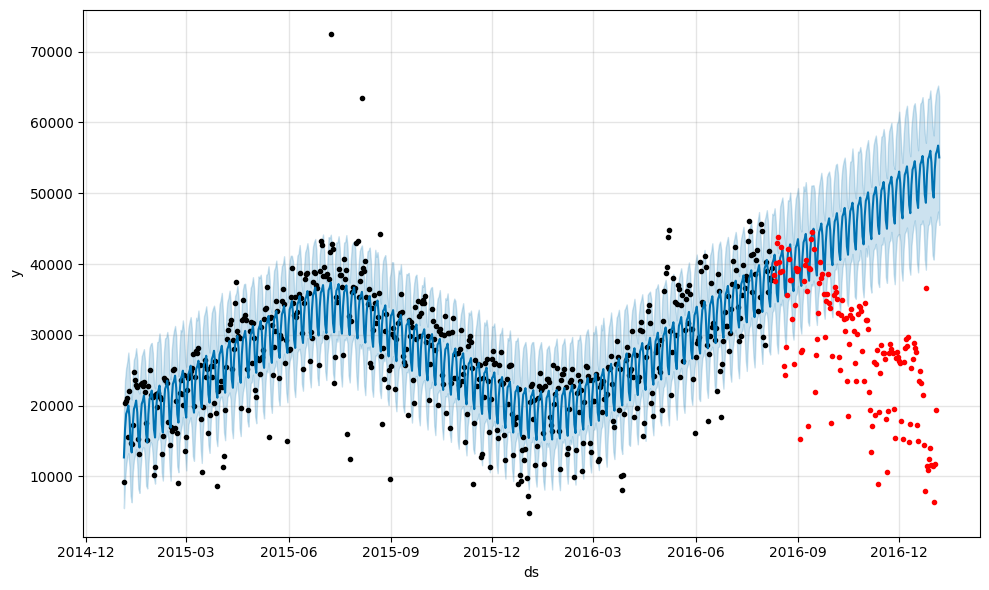

In [109]:
#Plotando o modelo em um gráfico
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

Percebemos que obtivemos um erro na nossa previsão. Por algum motivo o Prophet não levou em consideração a sazonalidade dos anos e acabou seguindo por este erro. Vamos entender quais foram os componentes considerados por ele.

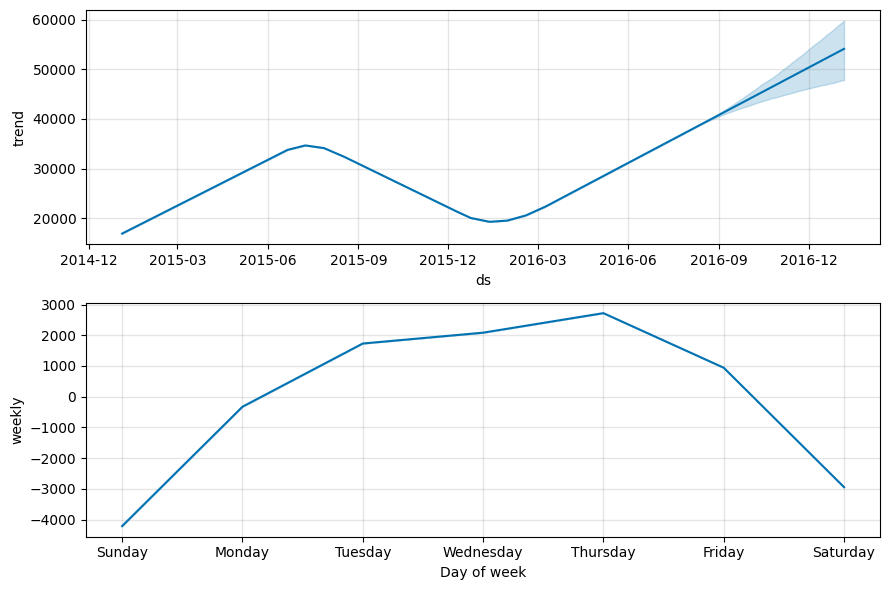

In [111]:
#Exibindo componentes
fig2 = modelo.plot_components(previsao)

Como podemos ver, dessa vez, não foi considerado o componente anual. Vamos observar com mais detalhes essas métricas.

### **Obtendo métricas**

Aqui iremos obter uma métrica que seja adequada ao nosso modelo de dados. Como não segue uma relação linear, no qual utilizaríamos o R2, precisamos encontrar outra maneira.

In [114]:
#Criando dataframe com valores de teste apenas
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,40578.718163,38430
1,2016-08-11,41319.073556,37626
2,2016-08-12,39648.849935,40159
3,2016-08-13,35867.643110,43041
4,2016-08-14,34706.462122,43848
...,...,...,...
141,2016-12-30,54329.197100,11566
142,2016-12-31,50547.990274,11424
143,2017-01-01,49386.809286,6421
144,2017-01-02,53373.710583,11823


Nessa comparação, vemos que o yhat começa acertando, mas ao final dos testes acaba errando muito no valor de y. Para melhorar isso, podemos utilizar métricas.

#### Métricas

A métrica MSE *(Mean Squared Error)* é uma medida comum de avaliação de desempenho para modelos de regressão e previsão. Ela calcula a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais observados nos dados de teste. Matematicamente, o MSE é calculado pela fórmula:

$MSE = \frac{\sum_{} (y_i - \hat{y}_i)^2}{n}$

No entanto, o MSE tem uma limitação: suas unidades são quadráticas em relação às unidades originais dos dados. Isso pode tornar difícil interpretar o seu valor
Para superar essa limitação, muitas vezes é preferível usar o RMSE *(Root Mean Squared Error)*. O RMSE é simplesmente a raiz quadrada do MSE e é calculado pela fórmula:

$RMSE = \sqrt{MSE}$

In [115]:
#Importando biblioteca
from sklearn.metrics import mean_squared_error

#Aplicando as métricas
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:461012998.29720056, RMSE:21471.21324697793


Percebemos que o MSE resultou em um valor muito alto devido à elevação ao quadrado das diferenças. Assim, o RMSE é mais compreensível e, neste caso, foi de 21.590. Isso significa que nosso modelo está errando, em média, 21.590 bicicletas por dia, o que é um erro bastante significativo.

## **6. Melhorando as previsões**

### **Observando componentes**

Agora que percebemos o quanto nosso modelo está errando, podemos analisar formas de melhorá-lo.
Como ele não estava utilizando o componente _yearly_, podemos forçar essa ativação ao treinar o modelo. 

In [118]:
#Retomando a semente aleatória
np.random.seed(4587)

#Treinamento do modelo e criação da previsão, incluindo o componente yearly
modelo = Prophet(yearly_seasonality=True)
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

17:38:52 - cmdstanpy - INFO - Chain [1] start processing
17:38:52 - cmdstanpy - INFO - Chain [1] done processing


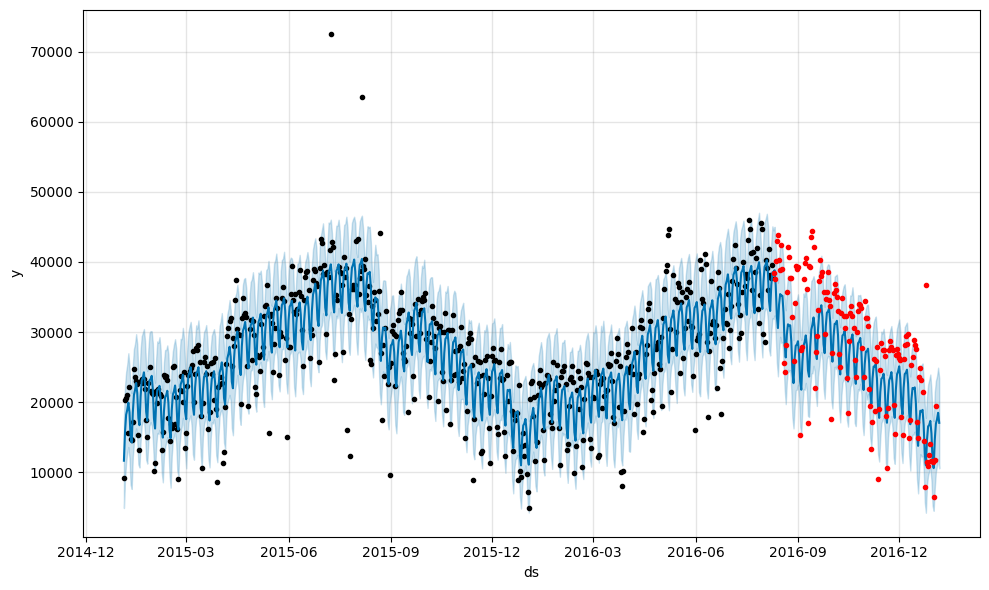

In [119]:
#Plotando a previsão
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

Agora temos a previsão bem mais próxima da realidade, somente modificando esse valor.

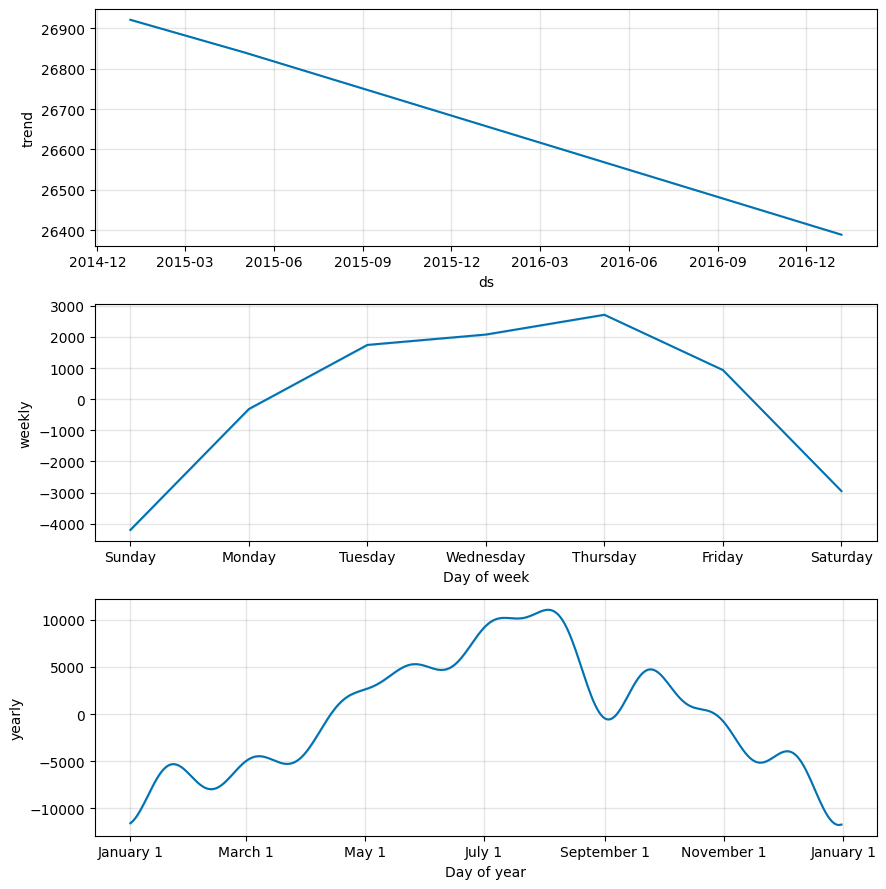

In [120]:
#Plotando compontentes
fig2 = modelo.plot_components(previsao)

Agora vemos que realmente temos o componente _yearly_, o que faz com que a previsão seja mais próxima da realidade. Para ter certeza, iremos testar as métricas.

In [121]:
#Criando a visão para verificar as métricas
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38535.991663,38430
1,2016-08-11,38820.212318,37626
2,2016-08-12,36645.867170,40159
3,2016-08-13,32314.809863,43041
4,2016-08-14,30575.120022,43848
...,...,...,...
141,2016-12-30,15566.419734,11566
142,2016-12-31,11741.513975,11424
143,2017-01-01,10608.947909,6421
144,2017-01-02,14663.372319,11823


In [122]:
#Calculando métricas
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:38023258.39534487, RMSE:6166.3002193653265


Comparando, vemos uma melhora significativa na métrica RMSE que caiu da faixa de 21.000 para 6.000. Apesar de termos uma melhora, podemos ajustar ainda mais.

### **Tratando os outliers**

Observando os gráficos anteriores, vemos que possuímos vários outliers ao longo da análise. Podemos entender se, ao excluir esses dados (os que estão fora do intervalo de confiança), teremos uma melhora no modelo.

Precisamos primeiro identificar quais seriam os intervalos, para depois verificar se podemos removê-los.

In [123]:
#Retomando nosso DataFrame
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [124]:
#Retomando semente aleatória
np.random.seed(4587)

#Treinando e modelo e exibindo a previsão
modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

17:51:40 - cmdstanpy - INFO - Chain [1] start processing
17:51:40 - cmdstanpy - INFO - Chain [1] done processing


In [125]:
#Criando DataFrame sem outliers
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [128]:
#Criando variáveis de treino sem os outliers
df_treino = pd.DataFrame()

#Separando 80% dos dados para treino
df_treino['ds'] = sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

In [129]:
#Criando variáveis de teste sem os outliers
df_teste = pd.DataFrame()

#Separando 20% dos dados para teste
df_teste['ds'] = sem_outliers['ds'][505:]
df_teste['y'] = sem_outliers['y'][505:]

Agora temos os conjuntos criados e podemos iniciar o treinamento com o DataFrame sem outliers.

### **Treinando com os dados tratados**

Vamos agora treinar os dados já tratados e verificar se obtemos alguma melhora no desempenho do modelo.

In [130]:
#Retomando semente aleatória
np.random.seed(4587)

#Treinando o modelo sem outliers
modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=150, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

17:57:43 - cmdstanpy - INFO - Chain [1] start processing
17:57:43 - cmdstanpy - INFO - Chain [1] done processing


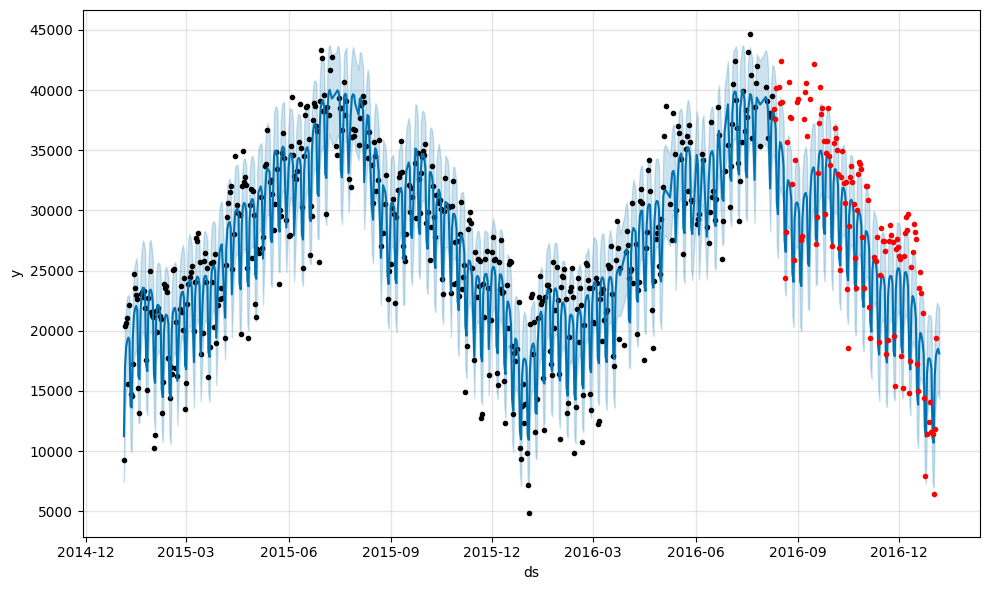

In [131]:
#Plotando a nova previsão
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [132]:
#Criando a tabela de comparação para testar as métricas
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38158.491516,38430
1,2016-08-11,37743.680499,37626
2,2016-08-12,36700.553377,40159
3,2016-08-15,34731.615970,40236
4,2016-08-16,35674.240835,38911
...,...,...,...
121,2016-12-30,16811.793881,11566
122,2016-12-31,11106.021022,11424
123,2017-01-01,10688.005959,6421
124,2017-01-02,16296.279237,11823


In [133]:
#Verificando e imprimindo as métricas
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 15478875.733726533, RMSE: 3934.3202378208275


Agora obtivemos uma métrica melhor, pois de 6.000 de diferença caímos para 3.000 de diferença. Nosso modelo se mostra agora mais fiel à realidade. 

### **Expandindo o período de previsão**

Agora que chegamos a bons valores nas métricas, podemos expandir o modelo para testar períodos maiores, como por exemplo, 365 dias. 
Agora criaremos um gráfico interativo para que possamos escolher a visualização de forma mais dinâmica.

In [135]:
#Retomando semente aleatória
np.random.seed(4587)

#Aumentando o período de previsão
modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=365, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

18:04:49 - cmdstanpy - INFO - Chain [1] start processing
18:04:49 - cmdstanpy - INFO - Chain [1] done processing


In [83]:
!pip install plotly

In [144]:
#Importando bibliotecas
from prophet.plot import plot_plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt

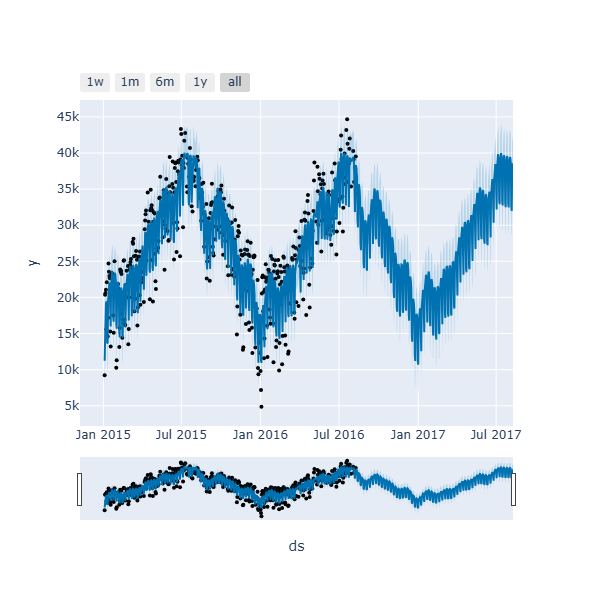

In [146]:
#Plotando gráficos das previsões
fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()